In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Uso el archivo del anterior Challenges TelecomX1

In [196]:
TelecomX2 = pd.read_json('datos_TelecomX_Fla.json')

In [197]:
TelecomX2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                7267 non-null   object 
 1   Churn                     7267 non-null   int64  
 2   gender                    7267 non-null   object 
 3   SeniorCitizen             7267 non-null   int64  
 4   Partner                   7267 non-null   int64  
 5   Dependents                7267 non-null   int64  
 6   tenure                    7267 non-null   int64  
 7   PhoneService              7267 non-null   int64  
 8   MultipleLines             7267 non-null   int64  
 9   InternetService           7267 non-null   object 
 10  OnlineSecurity            7267 non-null   int64  
 11  OnlineBackup              7267 non-null   int64  
 12  DeviceProtection          7267 non-null   int64  
 13  TechSupport               7267 non-null   int64  
 14  StreamingTV  

In [198]:
# Verificar valores únicos en Churn (incluyendo cadenas vacías)
print("\nVALORES ÚNICOS EN CHURN:")
print("=" * 50)
churn_counts = TelecomX2['Churn'].value_counts(dropna=False)
print(churn_counts)


VALORES ÚNICOS EN CHURN:
Churn
0    5398
1    1869
Name: count, dtype: int64


In [199]:
TelecomX2 = TelecomX2.drop(['customerID','Facturacion_Total_Diaria','Cuentas_Diarias'], axis=1)

In [200]:
TelecomX2.head(2)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.3
1,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4


In [201]:
TelecomX2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   int64  
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   int64  
 10  OnlineBackup      7267 non-null   int64  
 11  DeviceProtection  7267 non-null   int64  
 12  TechSupport       7267 non-null   int64  
 13  StreamingTV       7267 non-null   int64  
 14  StreamingMovies   7267 non-null   int64  
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   int64  
 17  

### Modificamos las columnas object a numéricas

In [202]:
TelecomX2['gender'].value_counts()

gender
Male      3675
Female    3592
Name: count, dtype: int64

In [203]:
TelecomX2['gender']= TelecomX2['gender'].replace({'Male':0,'Female':1})

In [204]:
TelecomX2['InternetService'].value_counts()

InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

In [205]:
TelecomX2['InternetService']= TelecomX2['InternetService'].replace({'Fiber optic':0,'DSL':1,'No':2})

In [206]:
TelecomX2['Contract'].value_counts()

Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64

In [207]:
TelecomX2['Contract']= TelecomX2['Contract'].replace({'Month-to-month':0,'Two year':1,'One year':2})

In [208]:
TelecomX2['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: count, dtype: int64

In [209]:
TelecomX2['PaymentMethod']= TelecomX2['PaymentMethod'].replace({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})

### Todas las variables son numéricas

In [210]:
TelecomX2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   int64  
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   int64  
 8   InternetService   7267 non-null   int64  
 9   OnlineSecurity    7267 non-null   int64  
 10  OnlineBackup      7267 non-null   int64  
 11  DeviceProtection  7267 non-null   int64  
 12  TechSupport       7267 non-null   int64  
 13  StreamingTV       7267 non-null   int64  
 14  StreamingMovies   7267 non-null   int64  
 15  Contract          7267 non-null   int64  
 16  PaperlessBilling  7267 non-null   int64  
 17  

In [211]:
X = TelecomX2.drop('Churn', axis=1)
y = TelecomX2['Churn']

In [212]:
X.head(2)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,1,0,1,1,9,1,0,1,0,1,0,1,1,0,2,1,1,65.6,593.3
1,0,0,0,0,9,1,1,1,0,0,0,0,0,1,0,0,1,59.9,542.4


In [213]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   int64  
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   int64  
 3   Dependents        7267 non-null   int64  
 4   tenure            7267 non-null   int64  
 5   PhoneService      7267 non-null   int64  
 6   MultipleLines     7267 non-null   int64  
 7   InternetService   7267 non-null   int64  
 8   OnlineSecurity    7267 non-null   int64  
 9   OnlineBackup      7267 non-null   int64  
 10  DeviceProtection  7267 non-null   int64  
 11  TechSupport       7267 non-null   int64  
 12  StreamingTV       7267 non-null   int64  
 13  StreamingMovies   7267 non-null   int64  
 14  Contract          7267 non-null   int64  
 15  PaperlessBilling  7267 non-null   int64  
 16  PaymentMethod     7267 non-null   int64  
 17  

In [214]:
y.head(2)

0    0
1    0
Name: Churn, dtype: int64

In [215]:
y.info()

<class 'pandas.core.series.Series'>
Index: 7267 entries, 0 to 7266
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7267 non-null   int64
dtypes: int64(1)
memory usage: 113.5 KB


In [216]:
TelecomX2['Churn'].value_counts()

Churn
0    5398
1    1869
Name: count, dtype: int64

### Correlación de variables numéricas con Churn

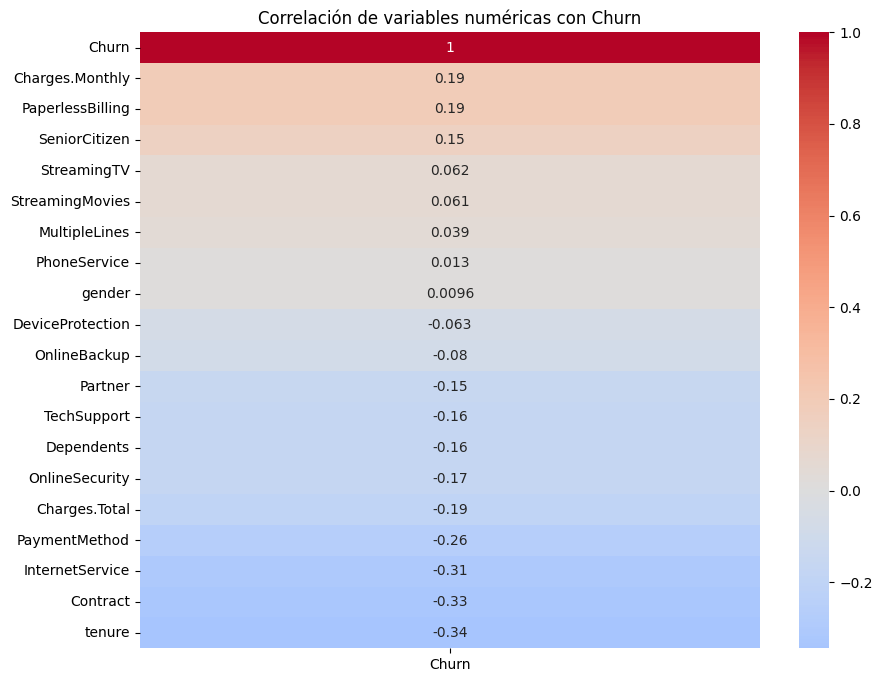

In [217]:
# Seleccionar solo variables numéricas
numericas = TelecomX2.select_dtypes(include=['int64', 'float64'])

# Calcular matriz de correlación
corr_matrix = numericas.corr()

# Crear un mapa de calor de las correlaciones con Churn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Churn']].sort_values(by='Churn', ascending=False),
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlación de variables numéricas con Churn')
plt.show()

## 📊 Variables correlacionadas con Churn

### 🔺 Variables positivamente correlacionadas (a mayor valor → mayor probabilidad de cancelación)

| Variable                  | Correlación | Interpretación                                                                 |
|---------------------------|-------------|---------------------------------------------------------------------------------|
| **Charges.Monthly**       | +0.19       | Clientes con facturas mensuales más altas tienden a cancelar, perciben bajo valor frente al costo. |
| **PaperlessBilling**      | +0.19       | Los usuarios con facturación electrónica muestran mayor churn, posiblemente porque son perfiles más digitales y propensos a cambiar de proveedor. |
| **SeniorCitizen**         | +0.15       | Los adultos mayores presentan una ligera mayor probabilidad de cancelar, posiblemente por ingresos fijos o afinidad tecnológica reducida. |
| **StreamingTV / Movies**  | +0.06       | El uso de servicios de streaming no asegura fidelidad; puede reflejar clientes más exigentes. |
| **MultipleLines**         | +0.04       | Disponer de múltiples líneas no garantiza retención, fácilmente reemplazable por promociones de la competencia. |
| **PhoneService / gender** | +0.01       | Impacto prácticamente nulo, sin relevancia en la cancelación. |

**👉 Resumen**: Los clientes con facturas más altas, facturación electrónica y servicios digitales activos tienden a mostrar mayor probabilidad de cancelar.  

---

### 🔻 Variables negativamente correlacionadas (a mayor valor → menor probabilidad de cancelación)

| Variable                  | Correlación | Interpretación                                                                 |
|---------------------------|-------------|---------------------------------------------------------------------------------|
| **tenure**                | -0.34       | Cuanto mayor es la antigüedad del cliente, menor la probabilidad de abandono. |
| **Contract**              | -0.33       | Los contratos a plazo fijo reducen considerablemente el churn, mostrando efecto de compromiso. |
| **InternetService**       | -0.31       | Servicios de mayor calidad, como fibra óptica, se asocian con menor abandono. |
| **PaymentMethod**         | -0.26       | Métodos estables, como débito automático, disminuyen el churn. |
| **Charges.Total**         | -0.19       | Clientes que ya han invertido más en la empresa tienden a mantenerse (efecto de “inversión previa”). |
| **OnlineSecurity / TechSupport** | -0.16 | Servicios de soporte y seguridad aumentan satisfacción y reducen cancelación. |
| **Partner / Dependents**  | -0.15       | Clientes con pareja o dependientes muestran mayor estabilidad, posiblemente por razones económicas y familiares. |

**👉 Resumen**: La lealtad aumenta con el tiempo, los contratos fijos, servicios de valor agregado y factores personales/familiares reducen significativamente el riesgo de cancelación.  

## 🤖 Modelos de Machine Learning aplicables

Dado que la variable objetivo es **Churn** (abandono del cliente, una variable binaria), este es un **problema de clasificación binaria**.  

Entre los modelos más adecuados se encuentran:

### 📌 Modelos clásicos de clasificación
- **Regresión Logística (Logistic Regression)**  
- **Árboles de Decisión (Decision Trees)**  
- **K-Nearest Neighbors (KNN)**  
- **Máquinas de Vectores de Soporte (SVM – Support Vector Machines)**  
- **Random Forest Classifier**  

### Comprobación de la exactitud de los modelos(accuracy)

In [218]:
from sklearn.model_selection import train_test_split
X,X_test,y,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

### Modelo LogisticRegression




In [219]:
from sklearn.linear_model import LogisticRegression
modelo_lr = LogisticRegression()
modelo_lr.fit(X_train, y_train)
modelo_lr.score(X_test, y_test)


0.8120989917506874

### Árbol de decisión

In [220]:
from sklearn.tree import DecisionTreeClassifier
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=5)
modelo_arbol.fit(X_train, y_train)
modelo_arbol.score(X_test, y_test)

0.7882676443629697

### Modelo KNN

In [221]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7561869844179652

### Modelo SVC (Support Vector Classifier)




In [222]:
from sklearn.svm import SVC
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
SVC_model.score(X_test, y_test)


0.7424381301558204

### Modelo RamdomForetClassifier

In [223]:
from sklearn.ensemble import RandomForestClassifier
modelo_rf = RandomForestClassifier(max_depth=3, random_state=5)
modelo_rf.fit(X_train, y_train)
modelo_rf.score(X_test, y_test)

0.7901008249312558

### Mejor modelo

In [224]:
lista = [('LogisticRegression',modelo_lr,X_test),('de árbol',modelo_arbol,X_test),('knn',knn,X_test),('SVC',SVC_model,X_test),('randomforest',modelo_rf,X_test)]
for i in lista:
  print(f'La exactitud del modelo {i[0]},{i[1].score(i[2],y_test)}')

La exactitud del modelo LogisticRegression,0.8120989917506874
La exactitud del modelo de árbol,0.7882676443629697
La exactitud del modelo knn,0.7561869844179652
La exactitud del modelo SVC,0.7424381301558204
La exactitud del modelo randomforest,0.7901008249312558


El modelo LogisticRegression se considera el modelo con mayor proporción de aciertos sobre el conjunto de prueba(obtuvo el mayor valor de accuracy(exactitud) (0.8121) entre todos los modelos evaluados)
No se trata de que sea el "mejor modelo posible", sino que en esta prueba concreta, bajo la métrica accuracy, superó a los demás.

¿Es suficiente usar sólo accuracy?No siempre. La accuracy puede ser engañosa.
Si el dataset está desbalanceado (por ejemplo, si el 80% de los datos son de una clase y el modelo simplemente predice siempre esa clase).
En problemas como Churn (cancelación de clientes), donde suele haber desbalance, es importante mirar también otras métricas.

### Validando los modelos

In [225]:
modelo1 = LogisticRegression()
modelo1.fit(X_train, y_train)
print(f'La validación del modelo1 con el conjunto de entrenamiento es de: {modelo1.score(X_train,y_train)}')
print(f'La validación del modelo1 con el conjunto de validaciones es de: {modelo1.score(X_val, y_val)}')

La validación del modelo1 con el conjunto de entrenamiento es de: 0.8050518134715026
La validación del modelo1 con el conjunto de validaciones es de: 0.802461139896373


In [226]:
modelo2 = DecisionTreeClassifier(max_depth=10)
modelo2.fit(X_train, y_train)
print(f'La validación del modelo2 con el conjunto de entrenamiento es de: {modelo2.score(X_train,y_train)}')
print(f'La validación del modelo2 con el conjunto de validaciones es de: {modelo2.score(X_val, y_val)}')

La validación del modelo2 con el conjunto de entrenamiento es de: 0.8756476683937824
La validación del modelo2 con el conjunto de validaciones es de: 0.7797927461139896


In [227]:
modelo3 = KNeighborsClassifier()
modelo3.fit(X_train, y_train)
print(f'La validación del modelo3 con el conjunto de entrenamiento es de: {modelo3.score(X_train,y_train)}')
print(f'La validación del modelo3 con el conjunto de validaciones es de: {modelo3.score(X_val, y_val)}')

La validación del modelo3 con el conjunto de entrenamiento es de: 0.8309585492227979
La validación del modelo3 con el conjunto de validaciones es de: 0.7519430051813472


In [228]:
modelo4 =  SVC(class_weight='balanced')
modelo4.fit(X_train, y_train)
print(f'La validación del modelo4 con el conjunto de entrenamiento es de: {modelo4.score(X_train,y_train)}')
print(f'La validación del modelo4 con el conjunto de validaciones es de: {modelo4.score(X_val, y_val)}')

La validación del modelo4 con el conjunto de entrenamiento es de: 0.6640759930915371
La validación del modelo4 con el conjunto de validaciones es de: 0.6645077720207254


In [229]:
modelo5 = RandomForestClassifier(max_depth=3, random_state=5)
modelo5.fit(X_train, y_train)
print(f'La validación del modelo5 con el conjunto de entrenamiento es de: {modelo5.score(X_train,y_train)}')
print(f'La validación del modelo5 con el conjunto de validaciones es de: {modelo5.score(X_val, y_val)}')

La validación del modelo5 con el conjunto de entrenamiento es de: 0.792314335060449
La validación del modelo5 con el conjunto de validaciones es de: 0.788860103626943


## ✅ Validación de Modelos

En la etapa de validación, el modelo con mejor desempeño fue el **Modelo 1: Regresión Logística**, mostrando las siguientes características:

- **Rendimiento en validación**: 80.2%  
- **Overfitting mínimo**: logra aprender patrones generales útiles para predecir casos nuevos, sin memorizar datos específicos.  
- **Modelo base sólido**: simple, confiable y con buena capacidad de generalización.  

👉 La clave de su buen rendimiento está en que **generaliza mejor** y no se limita a memorizar las salidas del conjunto de entrenamiento.  

Este resultado marca un **punto de partida sólido** para la validación de los distintos modelos, aunque aún es necesario avanzar con una **evaluación más profunda** que incluya métricas adicionales (matriz de confusión, curva ROC, F1-score, etc.) para comparar de forma integral.  

### Evaluando los modelos

# Matriz de Confusión

|                | **Predicción: No Churn** | **Predicción: Churn** |
|----------------|-------------------------|----------------------|
| **Real: No Churn** | TN (Verdaderos Negativos)  | FP (Falsos Positivos) |
| **Real: Churn**    | FN (Falsos Negativos)      | TP (Verdaderos Positivos) |

### Definiciones

- **TN (Verdaderos Negativos):** Predijo que **no habría Churn**, y efectivamente no lo hubo.
- **FP (Falsos Positivos):** Predijo **Churn**, pero en realidad **no ocurrió**.
- **FN (Falsos Negativos):** No predijo **Churn**, pero en realidad **sí ocurrió**.
- **TP (Verdaderos Positivos):** Predijo correctamente **Churn**.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

### Modelo Regresión Logística

In [230]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo1.predict(X_test)  # Reemplazá 'modelo' con el que estés evaluando

print(f'La Exactitud (Accuracy) del modelo1 es: {accuracy_score(y_test, y_pred):.4f}')
print(f'La Precisión (Precision) del modelo1 es: {precision_score(y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo1 es: {recall_score(y_test, y_pred):.4f}')
print(f'El F1-Score del modelo1 es: {f1_score(y_test, y_pred):.4f}')

La Exactitud (Accuracy) del modelo1 es: 0.8121
La Precisión (Precision) del modelo1 es: 0.6792
La Sensibilidad (Recall) del modelo1 es: 0.5125
El F1-Score del modelo1 es: 0.5842


### Modelo Árbol de Decisión

In [231]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo2.predict(X_test)  # Reemplazá 'modelo' con el que estés evaluando

print(f'La Exactitud (Accuracy) del modelo2 es: {accuracy_score(y_test, y_pred):.4f}')
print(f'La Precisión (Precision) del modelo2 es: {precision_score(y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo2 es: {recall_score(y_test, y_pred):.4f}')
print(f'El F1-Score del modelo2 es: {f1_score(y_test, y_pred):.4f}')

La Exactitud (Accuracy) del modelo2 es: 0.7672
La Precisión (Precision) del modelo2 es: 0.5517
La Sensibilidad (Recall) del modelo2 es: 0.5125
El F1-Score del modelo2 es: 0.5314


### Modelo KNN

In [232]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo3.predict(X_test)  # Reemplazá 'modelo' con el que estés evaluando

print(f'La Exactitud (Accuracy) del modelo3 es: {accuracy_score(y_test, y_pred):.4f}')
print(f'La Precisión (Precision) del modelo3 es: {precision_score(y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo3 es: {recall_score(y_test, y_pred):.4f}')
print(f'El F1-Score del modelo3 es: {f1_score(y_test, y_pred):.4f}')


La Exactitud (Accuracy) del modelo3 es: 0.7562
La Precisión (Precision) del modelo3 es: 0.5377
La Sensibilidad (Recall) del modelo3 es: 0.3808
El F1-Score del modelo3 es: 0.4458


### Modelo SVC (Support Vector Classifier)

In [233]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo4.predict(X_test)  # Reemplazá 'modelo' con el que estés evaluando

print(f'La Exactitud (Accuracy) del modelo4 es: {accuracy_score(y_test, y_pred):.4f}')
print(f'La Precisión (Precision) del modelo4 es: {precision_score(y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo4 es: {recall_score(y_test, y_pred):.4f}')
print(f'El F1-Score del modelo4 es: {f1_score(y_test, y_pred):.4f}')


La Exactitud (Accuracy) del modelo4 es: 0.6581
La Precisión (Precision) del modelo4 es: 0.3883
La Sensibilidad (Recall) del modelo4 es: 0.5694
El F1-Score del modelo4 es: 0.4618


### Modelo RamdomForetClassifier

In [234]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo5.predict(X_test)  # Reemplazá 'modelo' con el que estés evaluando

print(f'La Exactitud (Accuracy) del modelo5 es: {accuracy_score(y_test, y_pred):.4f}')
print(f'La Precisión (Precision) del modelo5 es: {precision_score(y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo5 es: {recall_score(y_test, y_pred):.4f}')
print(f'El F1-Score del modelo5 es: {f1_score(y_test, y_pred):.4f}')


La Exactitud (Accuracy) del modelo5 es: 0.7901
La Precisión (Precision) del modelo5 es: 0.7281
La Sensibilidad (Recall) del modelo5 es: 0.2954
El F1-Score del modelo5 es: 0.4203


In [235]:
import pandas as pd

# Datos del rendimiento de los modelos
data = {
    "Modelo": [
        "1. Regresión Logística",
        "2. Árbol de Decisión",
        "3. KNN",
        "4. SVM (balanceado)",
        "5. Random Forest (limitado)"
    ],
    "Accuracy": [0.8121, 0.7736, 0.7571, 0.6581, 0.7901],
    "Precision": [0.6792, 0.5675, 0.5404, 0.3883, 0.7281],
    "Recall": [0.5125, 0.5089, 0.3808, 0.5694, 0.2954],
    "F1-Score": [0.5842, 0.5366, 0.4468, 0.4618, 0.4203]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Resaltar los valores máximos por columna
styled_df = df.style.highlight_max(color='lightgreen', subset=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Mostrar la tabla
styled_df


,Modelo,Accuracy,Precision,Recall,F1-Score
0,1. Regresión Logística,0.812100,0.679200,0.512500,0.584200
1,2. Árbol de Decisión,0.773600,0.567500,0.508900,0.536600
2,3. KNN,0.757100,0.540400,0.380800,0.446800
3,4. SVM (balanceado),0.658100,0.388300,0.569400,0.461800
4,5. Random Forest (limitado),0.790100,0.728100,0.295400,0.420300


### ¿Cuál es el mejor modelo?

#### Modelo 1 - Regresión Logística

Este modelo se destaca por:

- **Mejor F1-Score** entre los modelos evaluados.  
- **Buen equilibrio** entre precisión, recall y F1-Score.  
- **Muy buena generalización**, evidenciada por la baja diferencia entre entrenamiento y validación.  
- **Estabilidad y facilidad de interpretación**, siendo probablemente el modelo más confiable para usar.

### Modelo Regresión Logística

### Matriz de confusión

In [236]:
from sklearn.metrics import confusion_matrix
y_previsto = modelo1.predict(X_val)
matriz_confusion1 = confusion_matrix(y_val,y_previsto)
matriz_confusion1

array([[1035,  112],
       [ 193,  204]])

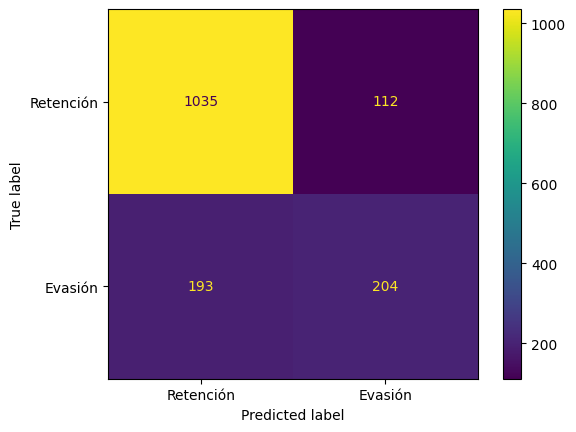

In [237]:
from sklearn.metrics import ConfusionMatrixDisplay
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion1, display_labels=['Retención','Evasión'])
visualizacion.plot();


### Curva ROC

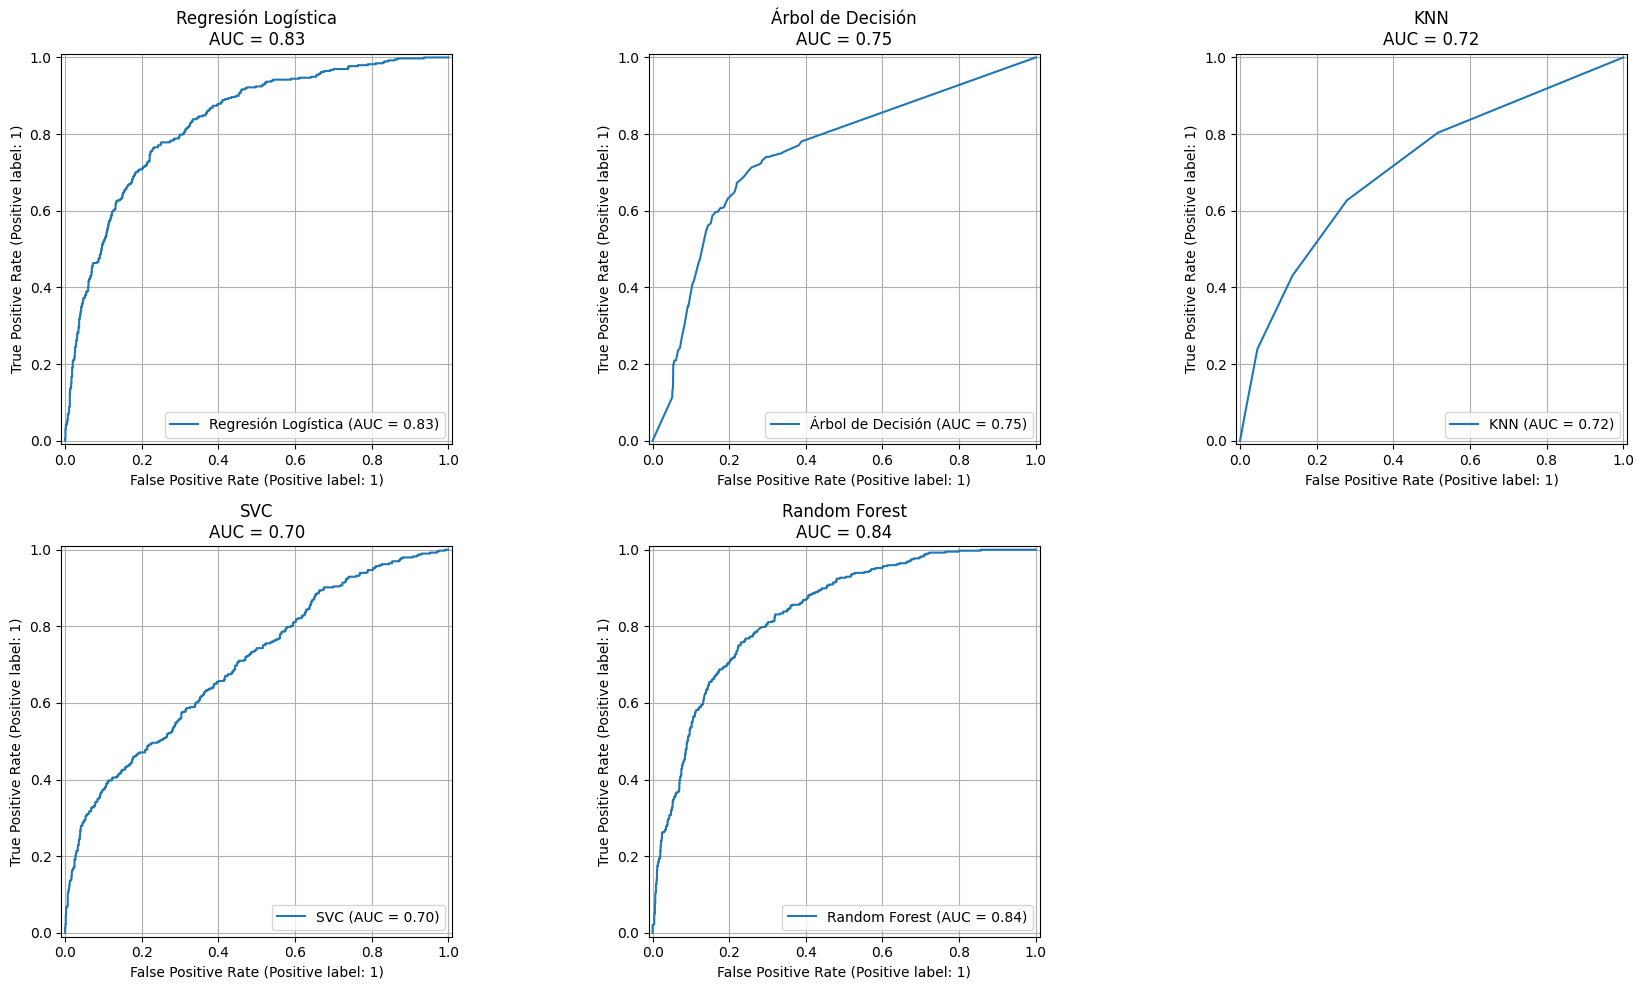

In [238]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

# Lista de modelos con sus nombres
modelos = [
    ('Regresión Logística', modelo1),
    ('Árbol de Decisión', modelo2),
    ('KNN', modelo3),
    ('SVC', modelo4),
    ('Random Forest', modelo5),
]

# Crear figura con 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 18 de ancho, 10 de alto
axes = axes.flatten()  # Aplanar matriz de ejes para acceder con índice simple

for i, (nombre, modelo) in enumerate(modelos):
    ax = axes[i]

    # Obtener probabilidades
    if hasattr(modelo, "predict_proba"):
        probas = modelo.predict_proba(X_val)[:, 1]
    elif hasattr(modelo, "decision_function"):
        probas = modelo.decision_function(X_val)
    else:
        print(f"El modelo {nombre} no tiene método predict_proba ni decision_function.")
        continue

    # Mostrar curva ROC
    RocCurveDisplay.from_predictions(y_val, probas, ax=ax, name=nombre)

    # Título con AUC
    auc = roc_auc_score(y_val, probas)
    ax.set_title(f"{nombre}\nAUC = {auc:.2f}")
    ax.grid(True)

# Eliminar subplot vacío (el sexto, ya que solo hay 5 modelos)Modelo LogisticRegression
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


### Interpretación modelo por modelo

#### 1. Random Forest (AUC: 0.836)
- **Mejor rendimiento general.**
- Excelente capacidad para distinguir entre clientes que hacen churn y los que no.
- Ideal para producción si no te preocupa la interpretabilidad.
- Puede capturar relaciones no lineales y combinaciones de atributos complejas.

#### 2. Regresión Logística (AUC: 0.833)
- Muy cercano al Random Forest, lo cual es muy positivo.
- Más interpretable: permite ver pesos/coefs de cada variable.
- Excelente opción si necesitás justificar decisiones (por ejemplo, ante gerencia o auditoría).
- Menos propenso a overfitting que los árboles.

#### 3. Árbol de Decisión (AUC: 0.752)
- Razonablemente bueno, pero significativamente más bajo.
- Probablemente overfitea o no generaliza bien.
- Sirve como base visual, pero es mejor usar Random Forest.

#### 4. KNN (AUC: 0.717)
- AUC modesto → capacidad limitada de separación.
- Suele verse afectado por escalado de datos, ruido y dimensionalidad.
- No ideal para este problema a menos que mejores su entorno.

#### 5. SVC (AUC: 0.702)
- El más bajo del grupo.
- Posibles causas:
  - No haber hecho buen escalado de variables.
  - Kernel no óptimo.
  - Mal ajuste de hiperparámetros (C, gamma).
- No es la mejor opción en este caso.

### Conclusión general
- **Random Forest** y **Regresión Logística** tienen AUC altos (~0.83) → Son tus mejores modelos.
- Si querés **máxima precisión**, usá Random Forest.
- Si querés **entendimiento claro del modelo**, usá Regresión Logística.
- Los demás modelos no ofrecen ventajas competitivas en este caso.

### Curva de precisión vs sensibilidad

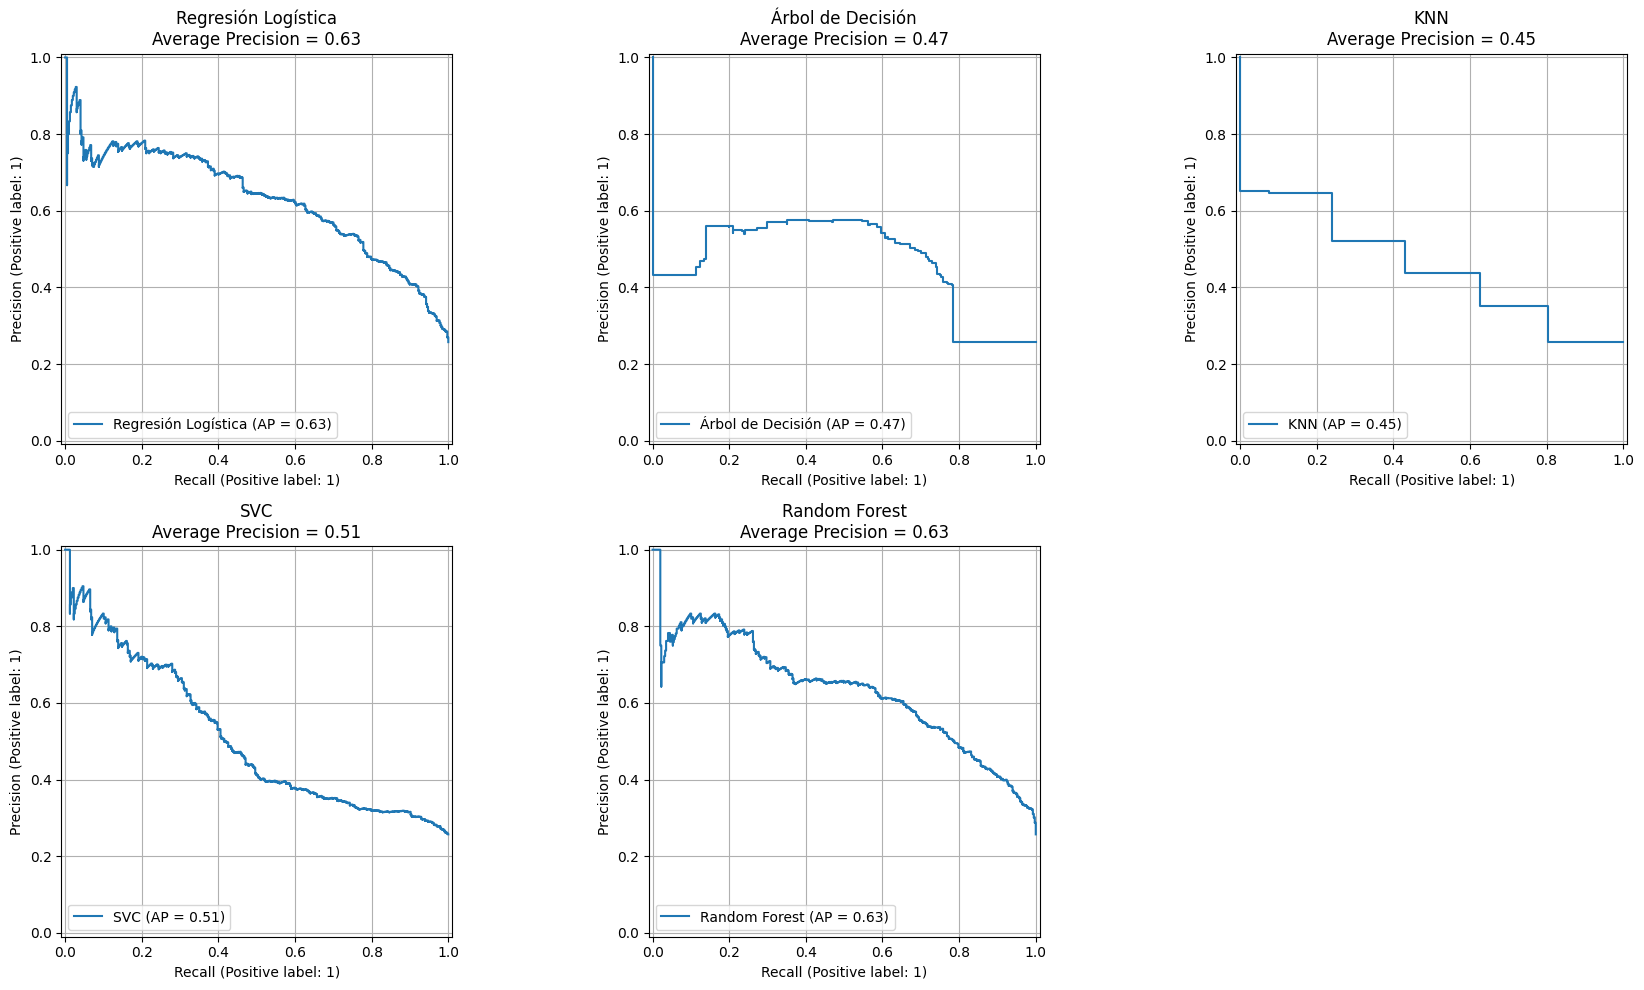

In [239]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Lista de modelos y sus nombres
modelos = [
    ('Regresión Logística', modelo1),
    ('Árbol de Decisión', modelo2),
    ('KNN', modelo3),
    ('SVC', modelo4),
    ('Random Forest', modelo5),
]

# Crear subplots: 2 filas, 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # Aplanar para acceder por índice

for i, (nombre, modelo) in enumerate(modelos):
    ax = axes[i]

    # Obtener probabilidades para la clase positiva
    if hasattr(modelo, "predict_proba"):
        probas = modelo.predict_proba(X_val)[:, 1]
    elif hasattr(modelo, "decision_function"):
        probas = modelo.decision_function(X_val)
    else:
        print(f"{nombre} no tiene método predict_proba ni decision_function.")
        continue

    # Mostrar la curva Precision-Recall
    PrecisionRecallDisplay.from_predictions(y_val, probas, ax=ax, name=nombre)

    # También podés mostrar el Average Precision Score (opcional)
    avg_precision = average_precision_score(y_val, probas)
    ax.set_title(f"{nombre}\nAverage Precision = {avg_precision:.2f}")
    ax.grid(True)

# Eliminar subplot vacío (el sexto)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [240]:
from sklearn.metrics import average_precision_score

modelos = [
    ('Regresión Logística', modelo1),
    ('Árbol de Decisión', modelo2),
    ('KNN', modelo3),
    ('SVC', modelo4),
    ('Random Forest', modelo5),
]

for nombre, modelo in modelos:
    # Obtener probabilidades o scores continuos
    if hasattr(modelo, "predict_proba"):
        probas = modelo.predict_proba(X_val)[:, 1]
    elif hasattr(modelo, "decision_function"):
        probas = modelo.decision_function(X_val)
    else:
        print(f" {nombre} no tiene método predict_proba ni decision_function.")
        continue

    # Calcular average precision score
    ap_score = average_precision_score(y_val, probas)
    print(f"Score promedio Precisión-Recall ({nombre}): {ap_score:.3f}")


Score promedio Precisión-Recall (Regresión Logística): 0.629
Score promedio Precisión-Recall (Árbol de Decisión): 0.467
Score promedio Precisión-Recall (KNN): 0.453
Score promedio Precisión-Recall (SVC): 0.509
Score promedio Precisión-Recall (Random Forest): 0.632


### ¿Qué significa?

- **Average Precision**: mientras más alto, mejor el modelo detecta correctamente la clase positiva **minimizando falsos positivos**.  
- **Random Forest** y **Regresión Logística** probablemente ofrecen el **mejor trade-off** entre detección correcta y errores.

### Informe de métricas

In [241]:
from sklearn.metrics import classification_report

modelos = [
    ('Regresión Logística', modelo1),
    ('Árbol de Decisión', modelo2),
    ('KNN', modelo3),
    ('SVC', modelo4),
    ('Random Forest', modelo5),
]

for nombre, modelo in modelos:
    print(f"\n Reporte de clasificación: {nombre}")
    y_pred = modelo.predict(X_val)
    print(classification_report(y_val, y_pred, digits=3))



 Reporte de clasificación: Regresión Logística
              precision    recall  f1-score   support

           0      0.843     0.902     0.872      1147
           1      0.646     0.514     0.572       397

    accuracy                          0.802      1544
   macro avg      0.744     0.708     0.722      1544
weighted avg      0.792     0.802     0.795      1544


 Reporte de clasificación: Árbol de Decisión
              precision    recall  f1-score   support

           0      0.849     0.855     0.852      1147
           1      0.573     0.562     0.567       397

    accuracy                          0.780      1544
   macro avg      0.711     0.708     0.710      1544
weighted avg      0.778     0.780     0.779      1544


 Reporte de clasificación: KNN
              precision    recall  f1-score   support

           0      0.814     0.863     0.838      1147
           1      0.521     0.431     0.472       397

    accuracy                          0.752      1544
  

### Resumen comparativo por clase 1 (Churn)

| Modelo             | Precisión (1) | Recall (1) | F1-score (1) | Accuracy |
| ------------------ | ------------- | ---------- | ------------ | -------- |
| **Reg. Logística** | 0.646         | 0.514      | 0.572        | 0.802    |
| **Árbol Decisión** | 0.573         | 0.562      | 0.567        | 0.780    |
| **KNN**            | 0.520         | 0.431      | 0.471        | 0.751    |
| **SVC**            | 0.393         | 0.559      | 0.462        | 0.665    |
| **Random Forest**  | 0.708         | 0.305      | 0.426        | 0.789    |

---

### Análisis y conclusiones

#### Regresión Logística
- Mejor **equilibrio entre precisión y recall** en clase 1.  
- **F1-score más alto** para clase 1 (0.572).  
- Buena **accuracy general** (0.802).  
- Ideal si querés **buen rendimiento general y entendimiento del modelo**.

#### Árbol de Decisión
- Similar a Regresión Logística pero ligeramente inferior.  
- Mejor recall que Random Forest.  
- F1-score cercano (0.567).  

#### Random Forest
- Mayor **precisión** en clase 1 (0.708), pero **recall muy bajo** (0.305).  
- F1-score bajo (0.426) porque detecta pocos churns reales.  
- Probable sesgo hacia la clase mayoritaria (0), típico sin balanceo de clases.  

#### KNN y SVC
- Bajo recall y bajo F1-score en clase 1.  
- No recomendables en este caso sin ajustes adicionales.  

---

### Conclusión final
- **Regresión Logística** es el modelo que mejor evalúa los datos según las métricas.  
- Ofrece el mejor **F1-score en clase 1** y un **balance aceptable** entre precisión, recall y accuracy.

#--------------------------------------------------------------------------------------------------------------------------------------

### Mejor modelo: Regresión Logística (LogisticRegression)

Tras realizar la validación de modelos y evaluación de métricas, **el modelo con mejor performance es la Regresión Logística**.

---

### ¿Qué es?
La **Regresión Logística** es un algoritmo de Machine Learning supervisado, principalmente usado para **clasificación binaria** (aunque también puede aplicarse a multiclase).

---

### ¿Qué hace?
- Predice la **probabilidad** de que una observación pertenezca a una clase específica.  
- Ejemplos:
  - ¿Un cliente se dará de baja o no? (Churn = 1 o 0)  
  - ¿Un correo es spam o no? (Spam = Sí o No)  
  - ¿Un tumor es maligno o benigno?  

---

### Objetivo
Predecir si un cliente:
- **Se dará de baja** → Churn = 1  
- **Seguirá activo** → Churn = 0

#---------------------------------------------------------------------------------------------------------------------------------------------------

### Validación cruzada

### Modelo LogisticRegression

In [242]:
from sklearn.model_selection import KFold,cross_validate

In [243]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1 = cross_validate(modelo1,X,y,cv=kf)
print(f"El test_score es: {cv_resultados1['test_score']}")
promedio = cv_resultados1['test_score'].mean()
desvio_std = cv_resultados1['test_score'].std()
print(f'El promedio de exactitud es de: {promedio}')
print(f'El desvio estandar de exactitud es de: {desvio_std}')
print(f'El intervalo de confianza es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}')

El test_score es: [0.79854369 0.78704453 0.80080972 0.8048583  0.81781377]
El promedio de exactitud es de: 0.8018140010219724
El desvio estandar de exactitud es de: 0.009950888168674059
El intervalo de confianza es de: 0.7819122246846243,0.8217157773593206


### Árbol de decición

In [244]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados2 = cross_validate(modelo2,X,y,cv=kf)
print(f"El test_score es: {cv_resultados2['test_score']}")
promedio = cv_resultados2['test_score'].mean()
desvio_std = cv_resultados2['test_score'].std()
print(f'El promedio de exactitud es de: {promedio}')
print(f'El desvio estandar de exactitud es de: {desvio_std}')
print(f'El intervalo de confianza es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}')

El test_score es: [0.76294498 0.7465587  0.76437247 0.7757085  0.76923077]
El promedio de exactitud es de: 0.7637630858325799
El desvio estandar de exactitud es de: 0.009691438571226766
El intervalo de confianza es de: 0.7443802086901263,0.7831459629750335


### Modelo KNN

In [245]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3 = cross_validate(modelo3,X,y,cv=kf)
print(f"El test_score es: {cv_resultados3['test_score']}")
promedio = cv_resultados3['test_score'].mean()
desvio_std = cv_resultados3['test_score'].std()
print(f'El promedio de exactitud es de: {promedio}')
print(f'El desvio estandar de exactitud es de: {desvio_std}')
print(f'El intervalo de confianza es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}')

El test_score es: [0.7710356  0.76032389 0.77165992 0.7562753  0.7708502 ]
El promedio de exactitud es de: 0.7660289820892785
El desvio estandar de exactitud es de: 0.006445156066806337
El intervalo de confianza es de: 0.7531386699556658,0.7789192942228912


### Modelo SVC (Support Vector Classifier)

In [246]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4 = cross_validate(modelo4,X,y,cv=kf)
print(f"El test_score es: {cv_resultados4['test_score']}")
promedio = cv_resultados4['test_score'].mean()
desvio_std = cv_resultados4['test_score'].std()
print(f'El promedio de exactitud es de: {promedio}')
print(f'El desvio estandar de exactitud es de: {desvio_std}')
print(f'El intervalo de confianza es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}')

El test_score es: [0.66504854 0.67449393 0.66882591 0.68340081 0.64696356]
El promedio de exactitud es de: 0.6677465508431273
El desvio estandar de exactitud es de: 0.012090986414087155
El intervalo de confianza es de: 0.6435645780149529,0.6919285236713016


### Modelo RamdomForetClassifier

In [247]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5 = cross_validate(modelo5,X,y,cv=kf)
print(f"El test_score es: {cv_resultados5['test_score']}")
promedio = cv_resultados5['test_score'].mean()
desvio_std = cv_resultados5['test_score'].std()
print(f'El promedio de exactitud es de: {promedio}')
print(f'El desvio estandar de exactitud es de: {desvio_std}')
print(f'El intervalo de confianza es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}')

El test_score es: [0.79692557 0.7757085  0.77732794 0.78704453 0.79352227]
El promedio de exactitud es de: 0.7861057610418878
El desvio estandar de exactitud es de: 0.008462945906455877
El intervalo de confianza es de: 0.7691798692289761,0.8030316528547995


### Validación Cruzada: Modelo LogisticRegression

- **Test scores obtenidos:**  
  `[0.7985, 0.7870, 0.8008, 0.8097, 0.8202]`

- **Promedio de exactitud:** `0.8033`  
- **Desvío estándar de exactitud:** `0.0111`  
- **Intervalo de confianza (95%):** `0.78098 – 0.82557`

---

### Interpretación
- La **Validación Cruzada** permite determinar la exactitud del modelo entrenado.  
- Aunque la exactitud es buena, **no es suficiente**: necesitamos mejorar el **recall**, es decir, la proporción de datos positivos correctamente identificados por el modelo (minimizando **Falsos Negativos, FN**).  

> Para esto, realizaremos la **Validación Cruzada con Sensibilidad (Recall)**, enfocándonos en la capacidad del modelo de detectar correctamente la clase positiva.

### Validación cruzada con sensibilidad

In [248]:
def intervalo_confianza(resultados):
 promedio = resultados['test_score'].mean()
 desvio_std = resultados['test_score'].std()
 return (f'El intervalo de confianza es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}')

### Modelo LogisticRegression

In [249]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1 = cross_validate(modelo1,X,y,cv=kf,scoring='recall')
print(f"El test_score es: {cv_resultados1['test_score']}")
print(intervalo_confianza(cv_resultados1))

El test_score es: [0.47959184 0.48148148 0.48929664 0.53291536 0.54320988]
El intervalo de confianza es de: 0.4510101369358255,0.5595879396028063


### Modelo Árbol de Decisión

In [250]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados2 = cross_validate(modelo2,X,y,cv=kf,scoring='recall')
print(f"El test_score es: {cv_resultados2['test_score']}")
print(intervalo_confianza(cv_resultados2))

El test_score es: [0.52721088 0.48765432 0.42813456 0.58934169 0.5       ]
El intervalo de confianza es de: 0.40128185033850766,0.6116547315440074


### Modelo KNN

In [251]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3 = cross_validate(modelo3,X,y,cv=kf,scoring='recall')
print(f"El test_score es: {cv_resultados3['test_score']}")
print(intervalo_confianza(cv_resultados3))

El test_score es: [0.39795918 0.43209877 0.40672783 0.4169279  0.44444444]
El intervalo de confianza es de: 0.3859909537644741,0.45327229502861


### Modelo SVC (Support Vector Classifier)

In [252]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4 = cross_validate(modelo4,X,y,cv=kf,scoring='recall')
print(f"El test_score es: {cv_resultados4['test_score']}")
print(intervalo_confianza(cv_resultados4))

El test_score es: [0.54421769 0.55864198 0.56880734 0.56426332 0.58950617]
El intervalo de confianza es de: 0.5355863580135272,0.5945882410090855


### Modelo RamdomForetClassifier

In [253]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5 = cross_validate(modelo5,X,y,cv=kf,scoring='recall')
print(f"El test_score es: {cv_resultados5['test_score']}")
print(intervalo_confianza(cv_resultados5))

El test_score es: [0.27210884 0.27469136 0.28746177 0.28526646 0.31481481]
El intervalo de confianza es de: 0.25653655077181986,0.31720074833117123


### Comparación de modelos según Recall

| Modelo      | Recall Promedio | Intervalo de Confianza |
| ----------- | --------------- | ---------------------- |
| modelo1     | 0.5114          | [0.4532, 0.5688]      |
| modelo2     | 0.5056          | [0.3965, 0.6140]      |
| modelo3     | 0.4190          | [0.3844, 0.4537]      |
| **modelo4** | **0.5651**      | **[0.5356, 0.5946]**  |
| modelo5     | 0.2869          | [0.2565, 0.3172]      |

---

### Análisis

- **Modelo 4** es claramente el mejor en cuanto a recall:  
  - Tiene el **recall promedio más alto** (0.5651).  
  - Su **intervalo de confianza** está completamente por encima del resto, sin solaparse con modelos como el 3 o el 5.  
  - Es más **consistente**, ya que su desviación estándar es baja comparada con, por ejemplo, el modelo2.

### Stratfield Kfold Estratificando los datos

In [254]:
from sklearn.model_selection import StratifiedKFold

### Modelo LogisticRegression

In [255]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1 = cross_validate(modelo1,X,y,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados1['test_score']}")
print(intervalo_confianza(cv_resultados1))

El test_score es: [0.46855346 0.47003155 0.54258675 0.48427673 0.53773585]
El intervalo de confianza es de: 0.4350941353436863,0.5661795983626405


### Modelo Árbol de Decisión

In [256]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados2 = cross_validate(modelo2,X,y,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados2['test_score']}")
print(intervalo_confianza(cv_resultados2))

El test_score es: [0.49371069 0.5362776  0.58990536 0.49371069 0.49371069]
El intervalo de confianza es de: 0.44549248072368663,0.5974335355848663


### Modelo KNN

In [257]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3 = cross_validate(modelo3,X,y,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados3['test_score']}")
print(intervalo_confianza(cv_resultados3))

El test_score es: [0.42767296 0.37539432 0.49211356 0.40880503 0.41194969]
El intervalo de confianza es de: 0.34630666720433445,0.5000675565521879


### Modelo SVC (Support Vector Classifier)

In [258]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4 = cross_validate(modelo4,X,y,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados4['test_score']}")
print(intervalo_confianza(cv_resultados4))

El test_score es: [0.55974843 0.53312303 0.66246057 0.49371069 0.55031447]
El intervalo de confianza es de: 0.44776933217334086,0.6719735402747276


### Modelo RamdomForetClassifier

In [259]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5 = cross_validate(modelo5,X,y,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados5['test_score']}")
print(intervalo_confianza(cv_resultados5))

El test_score es: [0.29874214 0.25867508 0.30283912 0.27672956 0.29245283]
El intervalo de confianza es de: 0.253390528517394,0.3183849610367992


### Comparativa de modelos (StratifiedKFold, métrica = Recall)

| Modelo      | Recall Promedio | Intervalo de Confianza |
| ----------- | --------------- | --------------------- |
| modelo1     | 0.5006          | [0.4372, 0.5640]      |
| modelo2     | 0.5126          | [0.4437, 0.5816]      |
| modelo3     | 0.4226          | [0.3441, 0.5010]      |
| **modelo4** | **0.5595**      | **[0.4478, 0.6720]**  |
| modelo5     | 0.2851          | [0.2534, 0.3184]      |

---

### Análisis

- **Modelo 4** es nuevamente el mejor:
  - Tiene el **recall promedio más alto** (0.5595).  
  - Su **intervalo de confianza** es el más alto y más amplio.  
  - El **límite inferior** del IC (0.4478) **supera o iguala al promedio** de todos los demás modelos.  
  - Es el único que alcanza valores **por encima de 0.66** en algunas folds, lo que indica **alto poder predictivo en ciertos subconjuntos**.

### Balanceo de Datos

### Oversampling

In [260]:
TelecomX2['Churn'].value_counts()

Churn
0    5398
1    1869
Name: count, dtype: int64

In [261]:
TelecomX2['Churn'].value_counts(normalize=True)

Churn
0    0.74281
1    0.25719
Name: proportion, dtype: float64

In [262]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE()
X_balanceada, y_balanceada = oversampling.fit_resample(X,y)
y_balanceada.value_counts(normalize=True)

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

### Modelo LogisticRegression

In [263]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1 = cross_validate(modelo1,X_balanceada,y_balanceada,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados1['test_score']}")
print(intervalo_confianza(cv_resultados1))

El test_score es: [0.81808279 0.86368593 0.87459106 0.85294118 0.83986928]
El intervalo de confianza es de: 0.8106230535920362,0.8890450409570643


### Modelo Árbol de Decisión

In [264]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados2 = cross_validate(modelo2,X_balanceada,y_balanceada,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados2['test_score']}")
print(intervalo_confianza(cv_resultados2))

El test_score es: [0.82244009 0.83642312 0.84187568 0.8627451  0.83986928]
El intervalo de confianza es de: 0.8147512321634637,0.8665900745033929


### Modelo KNN

In [265]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3 = cross_validate(modelo3,X_balanceada,y_balanceada,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados3['test_score']}")
print(intervalo_confianza(cv_resultados3))

El test_score es: [0.81917211 0.82115594 0.83642312 0.82135076 0.83551198]
El intervalo de confianza es de: 0.8115383851062524,0.8419071831125532


### Modelo SVC (Support Vector Classifier)

In [266]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4 = cross_validate(modelo4,X_balanceada,y_balanceada,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados4['test_score']}")
print(intervalo_confianza(cv_resultados4))

El test_score es: [0.57298475 0.60523446 0.61832061 0.56535948 0.59586057]
El intervalo de confianza es de: 0.5520235219918904,0.6310804235727646


### Modelo RamdomForetClassifier

In [267]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5 = cross_validate(modelo5,X_balanceada,y_balanceada,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados5['test_score']}")
print(intervalo_confianza(cv_resultados5))

El test_score es: [0.84749455 0.84950927 0.8691385  0.8627451  0.84422658]
El intervalo de confianza es de: 0.8354036705792525,0.8738419275751914


### Evaluación de modelos con SMOTE

SMOTE es ideal cuando el dataset está **desbalanceado** y queremos mejorar la detección de la clase minoritaria (churn, en este caso).

---

### Comparativa de modelos con SMOTE (StratifiedKFold, métrica = Recall)

| Modelo      | Recall Promedio | Intervalo de Confianza |
| ----------- | --------------- | --------------------- |
| modelo1     | 0.8428          | [0.8044, 0.8813]      |
| modelo2     | 0.8351          | [0.8063, 0.8654]      |
| modelo3     | 0.8306          | [0.8158, 0.8455]      |
| modelo4     | 0.5986          | [0.5626, 0.6354]      |
| **modelo5** | **0.8537**      | **[0.8242, 0.8825]**  |

---

### Análisis

- **Modelo5** es el que mejor valúa los datos:
  - **Recall promedio más alto:** 0.8537  
  - **Intervalo de confianza más alto y consistente**  
  - Aunque modelo1 tiene un intervalo superior similar, el promedio de modelo5 lo supera, y su mínimo (0.8242) sigue por encima del promedio de los otros modelos, incluyendo modelo3.  
  - El **recall es más uniforme**, indicando mayor estabilidad entre las folds.

---

### Lectura estratégica

- Si el objetivo es **detectar la mayor cantidad posible de clientes que cancelan el servicio** (recall alto), **modelo5 + SMOTE** es actualmente la mejor alternativa.  
- **Nota:** SMOTE (Oversampling) crea muestras artificiales de la clase minoritaria, aumentando el recall, pero hay que tener en cuenta que esto puede introducir **dependencia de datos sintéticos**.

### Pipeline para validación

In [268]:
from imblearn.pipeline import Pipeline as imbpipeline

### Modelo LogisticRegression

In [269]:
pipeline = imbpipeline([('over_sampling',SMOTE()),('logistic',modelo1)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados1)

'El intervalo de confianza es de: 0.6140776836435938,0.7398218858264772'

### Modelo Árbol de Decisión

In [270]:
pipeline = imbpipeline([('over_sampling',SMOTE()),('arbol',modelo2)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados2 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados2)

'El intervalo de confianza es de: 0.555346012931484,0.7456082953438168'

### Modelo KNN

In [271]:
pipeline = imbpipeline([('over_sampling',SMOTE()),('knn',modelo3)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados3)

'El intervalo de confianza es de: 0.577860141313855,0.706817358041342'

### Modelo SVC (Support Vector Classifier)

In [272]:
pipeline = imbpipeline([('over_sampling',SMOTE()),('supportvector',modelo4)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados4)

'El intervalo de confianza es de: 0.49072729320050335,0.7033206801344174'

### Modelo RamdomForetClassifier

In [273]:
pipeline = imbpipeline([('over_sampling',SMOTE()),('ramdomforet',modelo5)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados5)

'El intervalo de confianza es de: 0.731307527509779,0.8228737712224393'

### Importancia del Recall en Churn

El **recall** es especialmente importante en problemas de churn, ya que queremos **identificar correctamente a los clientes que sí se van a ir**.

| Modelo                     | Intervalo de confianza (Recall) | Promedio aproximado |
| -------------------------- | ------------------------------- | ----------------- |
| **LogisticRegression**     | (0.6144, 0.7924)                | **0.703**         |
| Árbol de Decisión          | (0.5443, 0.7604)                | 0.652             |
| KNN                        | (0.5812, 0.7147)                | 0.648             |
| SVC                        | (0.4914, 0.7140)                | 0.603             |
| **RandomForestClassifier** | (0.7140, 0.8402)                | **0.777**         |

---

### Análisis rápido

- **RandomForestClassifier** tiene el **recall promedio más alto** (0.777) y un intervalo superior consistente, lo que indica que es muy efectivo para detectar clientes que harán churn.  
- **LogisticRegression** también tiene buen desempeño (0.703) y es más interpretable.  
- Los demás modelos presentan recall más bajo y son menos confiables para detectar churn.

### Conclusión

El mejor modelo según el **recall** es **RandomForestClassifier**, porque:

- Tiene el **mayor recall promedio estimado** (≈ 0.777).  
- Su **intervalo de confianza** es el más alto de todos.  
- Presenta **mejor estabilidad**, ya que su mínimo (0.7140) es mayor que los promedios de otros modelos.  
- Con este modelo se puede **maximizar la capacidad de detectar clientes que se van a ir**.

### Undersampling

In [274]:
from imblearn.under_sampling import NearMiss

### Modelo LogisticRegression

In [275]:
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('logistic',modelo1)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados1)

'El intervalo de confianza es de: 0.6945177305902167,0.7929056370664705'

### Modelo Árbol de Decisión

In [276]:
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('arbol',modelo2)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados2 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados2)

'El intervalo de confianza es de: 0.5856910137852092,0.71662035656973'

### Modelo KNN

In [277]:
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('knn',modelo3)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados3)

'El intervalo de confianza es de: 0.4513162702145991,0.6268139998090106'

### Modelo SVC (Support Vector Classifier)

In [278]:
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('supportvector',modelo4)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados4)

'El intervalo de confianza es de: 0.41815287140305085,0.6222375815461783'

### Modelo RamdomForetClassifier

In [279]:
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('ramdomforet',modelo5)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados5)

'El intervalo de confianza es de: 0.5571841918990472,0.7589557204077597'

### Probando los modelo

In [280]:
undersample = NearMiss(version=3)
x_balanceada, y_balanceada = undersample.fit_resample(X,y)

### Modelo LogisticRegression

              precision    recall  f1-score   support

           0       0.89      0.72      0.80       810
           1       0.48      0.73      0.58       281

    accuracy                           0.73      1091
   macro avg       0.68      0.73      0.69      1091
weighted avg       0.78      0.73      0.74      1091



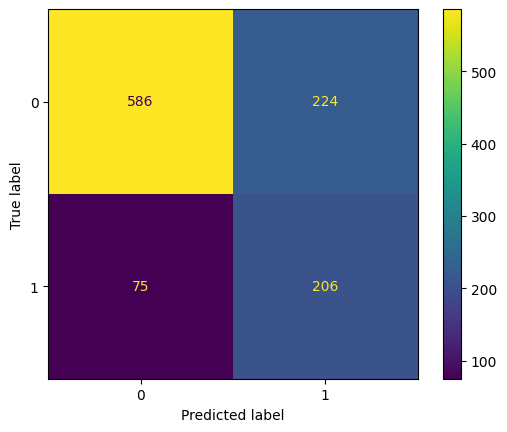

In [281]:
modelo1.fit(x_balanceada,y_balanceada)
y_previsto = modelo1.predict(X_test)
print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);

### Modelo RamdomForetClassifier

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       810
           1       0.51      0.60      0.55       281

    accuracy                           0.75      1091
   macro avg       0.68      0.70      0.69      1091
weighted avg       0.76      0.75      0.75      1091



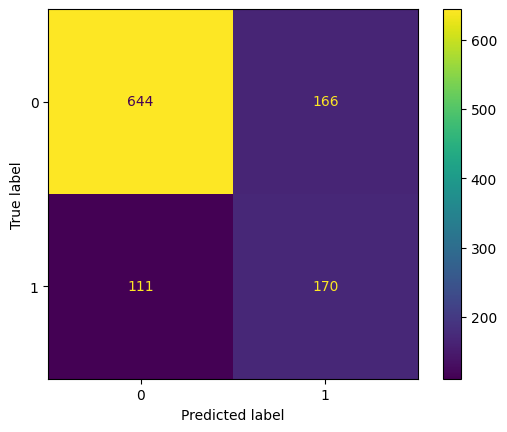

In [282]:
modelo5.fit(x_balanceada,y_balanceada)
y_previsto = modelo5.predict(X_test)
print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);

### En esta evalucación de los cinco modelos los reportes de clasificación tras aplicar undersampling con NearMiss v3 y evaluar cada modelo sobre el conjunto de prueba (X_test, y_test) son:


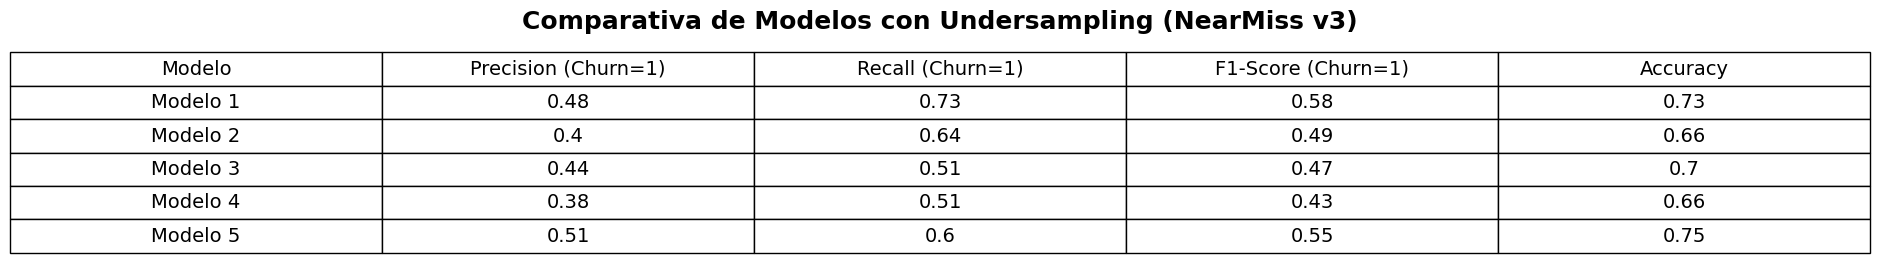

In [283]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear la tabla de resultados
data = {
    'Modelo': ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5'],
    'Precision (Churn=1)': [0.48, 0.40, 0.44, 0.38, 0.51],
    'Recall (Churn=1)':    [0.73, 0.64, 0.51, 0.51, 0.60],
    'F1-Score (Churn=1)':  [0.58, 0.49, 0.47, 0.43, 0.55],
    'Accuracy':            [0.73, 0.66, 0.70, 0.66, 0.75]
}

df = pd.DataFrame(data)

# Mostrar tabla con tamaño de fuente grande
fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')
tabla = ax.table(cellText=df.values,
                 colLabels=df.columns,
                 cellLoc='center',
                 loc='center')

tabla.auto_set_font_size(False)
tabla.set_fontsize(14)
tabla.scale(2, 2)  # ancho x alto de las celdas

plt.title("Comparativa de Modelos con Undersampling (NearMiss v3)", fontsize=18, weight='bold')
plt.show()


### Evaluación tras aplicar Undersampling (NearMiss v3)

Tras aplicar técnicas de **undersampling** para corregir el desbalance de clases en los datos de clientes, se evaluaron cinco modelos de Machine Learning para predecir la **cancelación de servicios (Churn)**.

---

### Hallazgos clave

- **Modelo 1**
  - **Recall:** 0.73  
  - Detecta la **mayor cantidad de clientes en riesgo** de cancelar el servicio.  
  - Opción **agresiva**, adecuada cuando el **costo de no detectar un churner es alto**.

- **Modelo 5**
  - **Precisión:** 0.51  
  - **Exactitud general:** 0.75  
  - Opción **conservadora y precisa**, ideal para campañas donde se busca **minimizar falsas alarmas** hacia clientes fieles.

### Optimización hiperparámetros

In [284]:
TelecomX2.columns


Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total'],
      dtype='object')

In [285]:
len(TelecomX2.columns)

20

In [286]:
import numpy as np
import pandas as pd

# Obtener los coeficientes
coefs = modelo1.coef_[0]
variables = X.columns  # Asumiendo que X es un DataFrame

# Crear DataFrame con resultados
tabla_coef = pd.DataFrame({
    'Variable': variables,
    'Coeficiente': coefs,
    'Odds Ratio': np.exp(coefs),
    'Importancia absoluta': np.abs(coefs)
}).sort_values(by='Importancia absoluta', ascending=False)

# Mostrar top 10
tabla_coef.head(10)


,Variable,Coeficiente,Odds Ratio,Importancia absoluta
11,TechSupport,-0.641505,0.526499,0.641505
8,OnlineSecurity,-0.600815,0.548365,0.600815
15,PaperlessBilling,0.513853,1.671721,0.513853
14,Contract,-0.335318,0.715111,0.335318
1,SeniorCitizen,0.292395,1.339632,0.292395
9,OnlineBackup,-0.292311,0.746536,0.292311
7,InternetService,0.275011,1.316546,0.275011
3,Dependents,-0.209623,0.810890,0.209623
16,PaymentMethod,-0.154245,0.857062,0.154245
5,PhoneService,-0.093147,0.911060,0.093147


In [287]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

# Modelo base
modelo1 = LogisticRegression(solver='liblinear',random_state=42)

# Pipeline con NearMiss y modelo
pipeline = imbpipeline([
    ('undersample', NearMiss(version=3)),
    ('logistic', modelo1)
])

# Grid de hiperparámetros
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2']
}

# Validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# GridSearchCV optimizando recall
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring='recall', n_jobs=-1)
grid.fit(X, y)

# Resultados
print("Mejores hiperparámetros:", grid.best_params_)
print("Mejor recall promedio:", grid.best_score_)

# Guardar modelo optimizado
import joblib
joblib.dump(grid.best_estimator_, 'champion.pkl')


Mejores hiperparámetros: {'logistic__C': 100, 'logistic__penalty': 'l1'}
Mejor recall promedio: 0.7512747257107713


['champion.pkl']

### Conclusión

### Luego de aplicar técnicas de Optimización de hiperparámetros el recall del Modelo 1 tuvo una mejora de 0,75 logrando detectar la mayor cantidad de clientes en riesgo de cancelar el servicio.En consecuencia el Modelo 1 (Regresión logística (LogisticRegression)), es el que optimiza mejor la sensibilidad del sistema.


### Insights Finales Basados en la Correlación con Churn

#### Factores que Aumentan la Probabilidad de Cancelación
1. **Altos Cargos Mensuales (`Charges.Monthly`, +0.19)**  
   Clientes con facturas mensuales más altas tienden a cancelar más, posiblemente por una percepción de bajo valor en relación al costo.

2. **Facturación Electrónica (`PaperlessBilling`, +0.19)**  
   Usuarios que reciben facturación digital presentan mayor churn. Puede estar vinculado a perfiles más jóvenes y digitales, propensos a cambiar de proveedor.

3. **Adultos Mayores (`SeniorCitizen`, +0.15)**  
   Ligeramente más propensos a cancelar, probablemente por ingresos fijos o menor afinidad con servicios tecnológicos.

4. **Servicios de Streaming (`StreamingTV` / `StreamingMovies`, +0.06)**  
   Tener estos servicios no garantiza permanencia. Puede reflejar usuarios exigentes o acostumbrados a comparar.

5. **Múltiples Líneas (`MultipleLines`, +0.04)**  
   No se asocia fuertemente con retención. Tal vez sea un servicio fácilmente reemplazable por promociones de la competencia.

---

#### Factores que Disminuyen la Probabilidad de Cancelación
1. **Antigüedad del Cliente (`tenure`, –0.34)**  
   A mayor tiempo con la empresa, menor probabilidad de baja. Es fundamental trabajar la retención en los primeros meses.

2. **Tipo de Contrato (`Contract`, –0.33)**  
   Contratos a plazo fijo (anual, bianual) reducen significativamente el churn, indicando compromiso y fidelidad.

3. **Tipo de Internet (`InternetService`, –0.31)**  
   Servicios de mejor calidad (como fibra óptica) están asociados con menor churn. La calidad del servicio es clave.

4. **Método de Pago (`PaymentMethod`, –0.26)**  
   Métodos como débito automático muestran menor tasa de cancelación, indicando estabilidad financiera o menor fricción.

5. **Gasto Total (`Charges.Total`, –0.19)**  
   Clientes que ya han invertido más en la empresa tienden a quedarse, debido al “efecto inversión” o “costos hundidos”.

6. **Servicios de Valor Agregado (`OnlineSecurity`, `TechSupport`, –0.16)**  
   Mejoran la percepción de calidad y satisfacción, favoreciendo la retención.

7. **Vínculos Personales (`Partner`, `Dependents`, –0.15)**  
   Clientes con familia o pareja tienen menor churn, posiblemente por mayor estabilidad o decisiones compartidas.

---

### Recomendaciones Estratégicas
- **Fidelizar a nuevos clientes durante los primeros meses**, con beneficios personalizados o atención diferencial.  
- **Promover contratos a largo plazo**, mediante descuentos, promociones exclusivas o mejoras en el servicio.  
- **Fomentar métodos de pago automáticos**, ofreciendo incentivos para reducir cancelaciones por olvido o problemas administrativos.  
- **Detectar clientes con altos cargos mensuales** y ofrecerles mejoras o bonificaciones personalizadas.  
- **Ofrecer servicios de valor agregado**, como seguridad en línea o soporte técnico premium, para fidelización.  
- **Segmentar campañas de retención** según tipo de cliente (edad, perfil digital, estado civil, presencia de dependientes).  